仿真版本论文中，可视化分析的部分。
实验结果文件夹:

simu\_result/
    
    - r2h
    - h2r（其中有几十个文件，由于占地太大存入了移动硬盘中）
    - task_count

In [7]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def sample_series(s, columns):
    return s.loc[[i for i in range(0, len(s), len(s)//200)], columns]
#     return s.loc[[i for i in range(0, len(s), len(s)//len(s))], columns]

# 机器人适应性w

将collaborate\_rescue.py文件中的collaborate_rescue_1中human_ps的注释更换到纪录robot\_p。

In [39]:
# 机器人适应性
result_w = [] 
for coef in [0.8, 0.5, 0.2]:
    result_w.append(collaborate_rescue_1(0.5, 0.8, 1-coef))

In [11]:
# 数据备份
for i in range(3):
    result_w[i].to_csv('simu_result/r2h/'+str(i)+'.csv', index=None)

In [3]:
# 数据读取
result_w = []
for i in range(3):
    result_w.append(pd.read_csv('simu_result/r2h/'+str(i)+'.csv'))

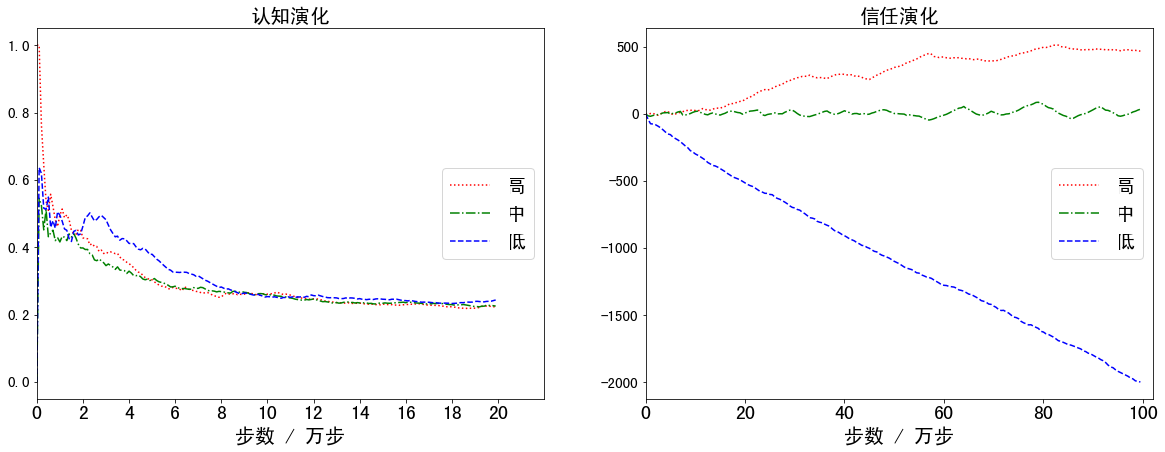

In [4]:
fig = plt.figure(figsize=(20, 15))

# 人类认知
d1 = sample_series(result_w[0][:2000], 'human_target_1')
d2 = sample_series(result_w[1][:2000], 'human_target_1')
d3 = sample_series(result_w[2][:2000], 'human_target_1')

ax4 = fig.add_subplot(2,2,1)
plt.xlabel(u'步数 / 万步', fontsize=20)
plt.xlim(0, 2200)
xticks = [str(x) for x in range(0, 22, 2)]
plt.xticks(np.arange(0, 2200, 200), xticks, fontsize=20)
plt.yticks(fontsize=15)
plt.title('认知演化', fontsize=20)
plt.plot(d1, 'r:')
plt.plot(d2, 'g-.')
plt.plot(d3, 'b--')
plt.legend([u'高', u'中', u'低'], fontsize=20, loc='center right')


# 人类信任
d1 = sample_series(result_w[0], 'human_trust')
d2 = sample_series(result_w[1], 'human_trust')
d3 = sample_series(result_w[2], 'human_trust')

ax1 = fig.add_subplot(2,2,2)
plt.xlabel(u'步数 / 万步', fontsize=20)
plt.xlim(0, 102000)
plt.title('信任演化', fontsize=20)
xticks = [str(x) for x in range(0, 102, 20)]
plt.xticks(np.arange(0, 102000, 20000), xticks, fontsize=20)
plt.yticks(fontsize=15)
plt.plot(d1, 'r:')
plt.plot(d2, 'g-.')
plt.plot(d3, 'b--')
plt.legend([u'高', u'中', u'低'], fontsize=20, loc='center right')

# 人类信任阈值delta与理性指数ita

|ita=0.25|ita=0.75
---|---|---
delta=0.25|低理性 易信任|高理性 易信任
delta=0.75|低理性 难信任|高理性 男信任

In [67]:
# 实验
result_ras = []
low_trus = []
high_trus = []

for i in range(10):
    print(str(i)+' ', end='')
    result_ra = []
    result_ra.append(collaborate_rescue_1(0.25, 0.25, 0.5))
    result_ra.append(collaborate_rescue_1(0.25, 0.75, 0.5))
    result_ra.append(collaborate_rescue_1(0.75, 0.25, 0.5))
    result_ra.append(collaborate_rescue_1(0.75, 0.75, 0.5))
    
    # 机器人0位置up动作的q值
    for i in range(4):
        result_ra[i]['robot_q'] = result_ra[i]['robot_q_0'].apply(lambda x:x.split(',')[0]).astype(float)
    
    cvg = {}
    for j in range(4):
        cvg[j] = convergence(result_ra[j])
    
    low_tru = [cvg[k] for k in [0,1]]
    high_tru = [cvg[k] for k in [2,3]]
        
    result_ras.append(result_ra)
    low_trus.append(low_tru)
    high_trus.append(high_tru)

0 1 2 3 4 5 6 7 8 9 

In [84]:
# 数据备份
k = 0
for i in range(10):
    for j in range(4):
        result_ras[i][j].to_csv('simu_result/h2r/'+str(k)+'.csv', index=None)
        k += 1

In [17]:
# 数据读取
k = 0
result_ras = [[0,0,0,0] for i in range(10)]
for i in range(10):
    for j in range(4):
        result_ras[i][j] = pd.read_csv('simu_result/h2r/'+str(k)+'.csv')
        k += 1

In [19]:
# 返回q值收敛的步数(万步)
def convergence(df):
    return list(df.robot_q).index(df.robot_q[df.robot_q>0.85].min()) / len(df.robot_q) * 10 # 仿真了几万步乘几

low_trus = []
high_trus = []

for i in range(10):
    
    result_ra = result_ras[i]
    
    # 机器人0位置up动作的q值
    for i in range(4):
        result_ra[i]['robot_q'] = result_ra[i]['robot_q_0'].apply(lambda x:x.split(',')[0]).astype(float)
    
    cvg = {}
    for j in range(4):
        cvg[j] = convergence(result_ra[j])
    
    low_tru = [cvg[k] for k in [0,1]]
    high_tru = [cvg[k] for k in [2,3]]
        
    result_ras.append(result_ra)
    low_trus.append(low_tru)
    high_trus.append(high_tru)

In [20]:
# 机器人q值收敛所用步数
low_tru = [sum([x[0] for x in low_trus])/10, sum([x[1] for x in low_trus])/10]
high_tru = [sum([x[0] for x in high_trus])/10, sum([x[1] for x in high_trus])/10]

In [29]:
# 机器人任务完成数量
robot_task_count = np.zeros((1, 4))
for result_ra in result_ras:
    tmp = []
    for df in result_ra:
        tmp.append(sum(df.robot_task_count))
    robot_task_count += np.array(tmp).reshape(1, 4)

low_tru_2 = [robot_task_count[0, i]/10 for i in [0,1]]
high_tru_2 = [robot_task_count[0, i]/10 for i in [2,3]]

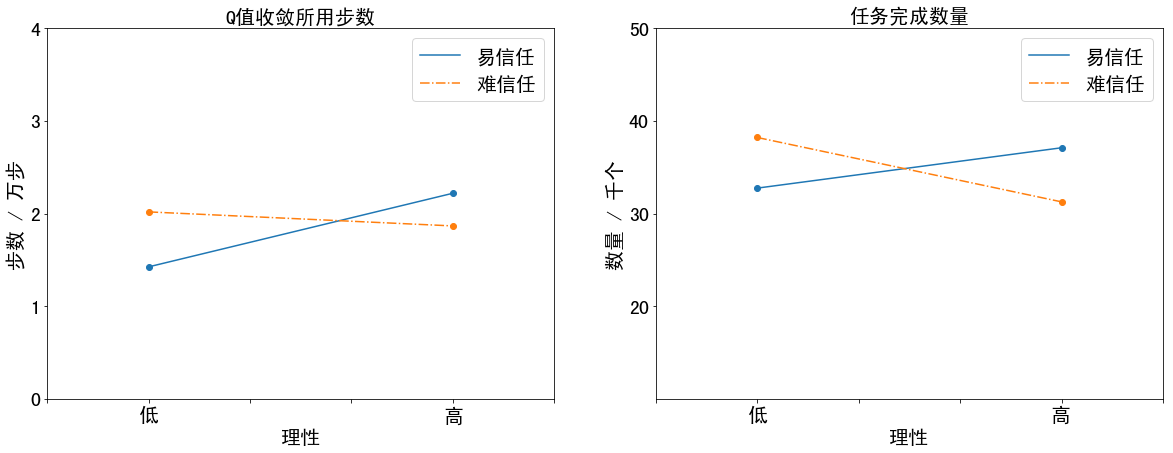

In [30]:
fig = plt.figure(figsize=(20,15))

# 机器人qtable
ax1 = fig.add_subplot(2,2,1)
plt.plot([0.2, 0.8], low_tru)
plt.scatter([0.2, 0.8], low_tru)
plt.plot([0.2, 0.8], high_tru, '-.')
plt.scatter([0.2, 0.8], high_tru)
plt.ylim(0,4)
plt.yticks([0,1,2,3,4], fontsize=20)
plt.title('Q值收敛所用步数', fontsize=20)
plt.ylabel('步数 / 万步', fontsize=20)
plt.xlim(0,1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0],['', '低', '', '',  '高',''], fontsize=20)
plt.xlabel(u'理性', fontsize=20)
plt.legend(['易信任','难信任'], fontsize=20, loc='upper right')

ax2 = fig.add_subplot(2,2,2)
plt.plot([0.2, 0.8], low_tru_2)
plt.scatter([0.2, 0.8], low_tru_2)
plt.plot([0.2, 0.8], high_tru_2, '-.')
plt.scatter([0.2, 0.8], high_tru_2)
plt.title('任务完成数量', fontsize=20)
plt.ylim(10000,25000)
plt.yticks([20000,30000,40000,50000], [20, 30, 40, 50], fontsize=20)
plt.ylabel('数量 / 千个', fontsize=20)
plt.xlim(0,1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0],['', '低', '', '',  '高',''], fontsize=20)
plt.xlabel(u'理性', fontsize=20)
plt.legend(['易信任','难信任'], fontsize=20, loc='upper right')

# 协作任务绩效

In [ ]:
# 机器人适应性
result = pd.DataFrame()
for coef in np.linspace(0, 1, 11):
    print('coef=', coef)
    task = []
    for i in range(30):
        print('-', end='')
        task.append(collaborate_rescue_2(0.5, 0.8, coef))
    print('')
    result['w_'+str(coef)] = np.array(task)

In [ ]:
# 人类信任阈值
result = pd.DataFrame()
for coef in np.linspace(0, 1, 11):
    print('coef=', coef)
    task = []
    for i in range(30):
        print('-', end='')
        task.append(collaborate_rescue_2(coef, 0.8, 0.5))
    print('')
    result['delta_'+str(coef)] = np.array(task)

In [ ]:
# 人类理性程度
result = pd.DataFrame()
for coef in np.linspace(0, 1, 11):
    print('coef=', coef)
    task = []
    for i in range(30):
        print('-', end='')
        task.append(collaborate_rescue_2(0.5, coef, 0.5))
    print('')
    result['ita_'+str(coef)] = np.array(task)

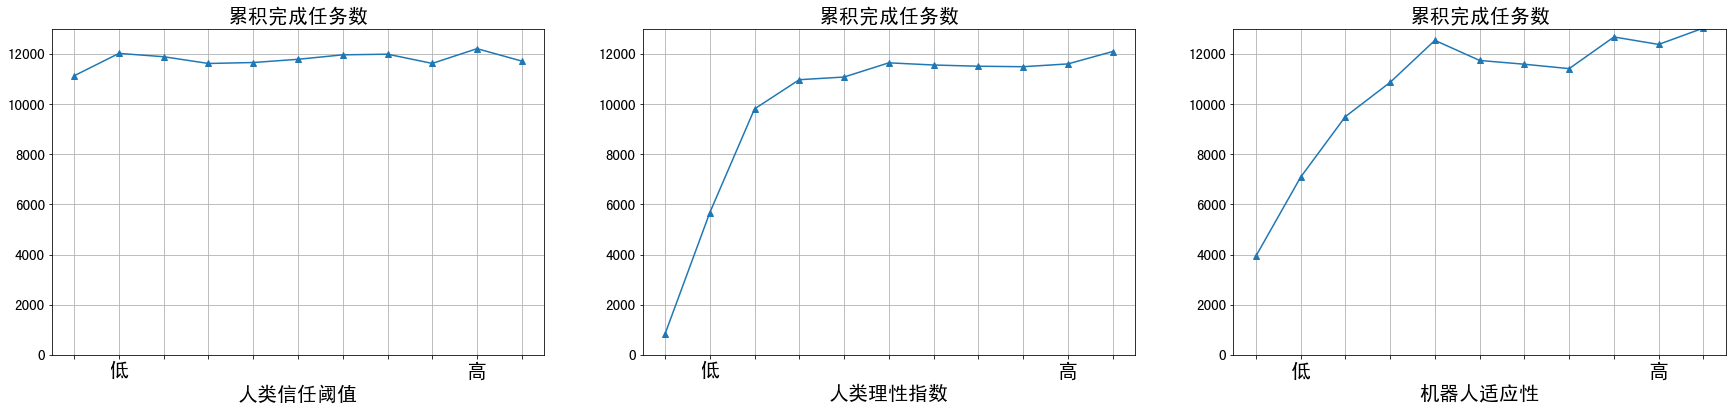

In [6]:
fig = plt.figure(figsize=(30, 6))

ax1 = fig.add_subplot(1,3,3)
# 机器人适应性
result = pd.read_csv('simu_result/task_count/w.csv')
task_count = np.sum(result, axis=0)/30
task_count.index = reversed([x for x in range(11)])
task_count = task_count.sort_index(ascending=True)
plt.plot(task_count, '-^')
plt.yticks(fontsize=15)
plt.ylim(0, 13000)
plt.xticks(task_count.index,  ['', '低', '', '', '', '', '', '', '', '高', ''],fontsize=20)
plt.xlabel('机器人适应性', fontsize=20)
plt.title(u'累积完成任务数', fontsize=20)
plt.grid()

ax2 = fig.add_subplot(1,3,1)
# 人类信任阈值
result = pd.read_csv('simu_result/task_count/delta.csv')
task_count = np.sum(result, axis=0)/30
task_count.index = [x for x in range(11)]
task_count = task_count.sort_index(ascending=True)
plt.plot(task_count, '-^')
plt.yticks(fontsize=15)
plt.ylim(0, 13000)
plt.xticks(task_count.index,  ['', '低', '', '', '', '', '', '', '', '高', ''],fontsize=20)
plt.xlabel('人类信任阈值', fontsize=20)
plt.title(u'累积完成任务数', fontsize=20)
plt.grid()

ax3 = fig.add_subplot(1,3,2)
# 人类理性指数
result = pd.read_csv('simu_result/task_count/ita.csv')
task_count = np.sum(result, axis=0)/30
task_count.index = [x for x in range(11)]
task_count = task_count.sort_index(ascending=True)
plt.plot(task_count, '-^')
plt.yticks(fontsize=15)
plt.ylim(0, 13000)
plt.xticks(task_count.index,  ['', '低', '', '', '', '', '', '', '', '高', ''],fontsize=20)
plt.xlabel('人类理性指数', fontsize=20)
plt.title(u'累积完成任务数', fontsize=20)
plt.grid()